## SIMPLE  AMORTIZATION  APPLICATION

In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Random Initial values
pv = 360000
rate = 0.05875
term = 30
pmt = npf.pmt(rate / 12, term * 12, -pv)

In [14]:
#Function that returns amortization table and summary. Default extra principal is zero!
def amortize(pv,rate,term,extra_principal=0):
    pmt = npf.pmt(rate / 12, term * 12, -pv)
    amort_table = pd.DataFrame({'Balance': np.zeros(term * 12 + 1), 
                            'Interest': np.zeros(term * 12 + 1),
                            'Principal': np.zeros(term * 12 + 1),
                            'Cum_Int' : np.zeros(term * 12 + 1)})
    amort_table['Balance'][0] = pv
    amort_table['Interest'][0] = amort_table['Balance'][0] * rate / 12
    amort_table['Principal'][0] = (pmt + extra_principal) - amort_table['Interest'][0]
    amort_table['Cum_Int'] = amort_table['Interest'].cumsum()
    for payment in range(1,360):
            actual_pmt  = pmt + extra_principal
            #max() to make value 0 if value is negative
            amort_table['Balance'][payment] = max(0,amort_table['Balance'][payment - 1] - amort_table['Principal'][payment - 1])
            amort_table['Interest'][payment] = rate / 12 * amort_table['Balance'][payment]
            amort_table['Principal'][payment] = actual_pmt - amort_table['Interest'][payment]
            if amort_table['Balance'][payment] < actual_pmt : #Loop exit condition
                amort_table['Principal'][payment] = amort_table['Balance'][payment]
                break
    amort_table['Cum_Int'] = amort_table['Interest'].cumsum()
    amort_table = round(amort_table,2)
    summary = pd.Series({
        'Interest': rate,
        'Payment' : round(pmt,2),
        'Extra Principal' : round(extra_principal,2),
        'Total interest' : round(amort_table['Cum_Int'].max(),2),
        'Periods' : round((amort_table.index[-2] + 1),2)
    })    
    
    return amort_table, summary

In [15]:
amort_table, summary = amortize(pv,rate,term)
print(amort_table.head())
print('\n',amort_table.tail())
print('\n',summary)

     Balance  Interest  Principal  Cum_Int
0  360000.00   1762.50     367.04  1762.50
1  359632.96   1760.70     368.83  3523.20
2  359264.13   1758.90     370.64  5282.10
3  358893.49   1757.08     372.45  7039.18
4  358521.04   1755.26     374.28  8794.44

      Balance  Interest  Principal    Cum_Int
356  8414.90     41.20    2088.34  406570.89
357  6326.56     30.97    2098.56  406601.87
358  4228.00     20.70    2108.84  406622.57
359  2119.16     10.38    2119.16  406632.94
360     0.00      0.00       0.00  406632.94

 Interest                0.05875
Payment              2129.54000
Extra Principal         0.00000
Total interest     406632.94000
Periods               360.00000
dtype: float64


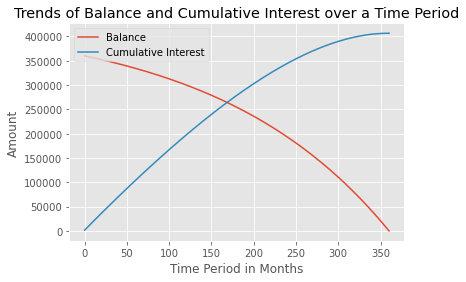

In [16]:
#Plot
with plt.style.context('ggplot'):
    plt.plot(amort_table['Balance'], label='Balance')
    plt.plot(amort_table['Cum_Int'], label = 'Cumulative Interest')
    plt.title('Trends of Balance and Cumulative Interest over a Time Period')
    plt.xlabel('Time Period in Months')
    plt.ylabel('Amount')
    plt.legend(loc=2)

Case  1

Balance          =  360000 
Rate of Interest =  0.05875 
Time period      =  30 
Extra Principal  = 961

      Balance  Interest  Principal  Cum_Int
0  360000.00   1762.50    1328.04  1762.50
1  358671.96   1756.00    1334.54  3518.50
2  357337.43   1749.46    1341.07  5267.96
3  355996.35   1742.90    1347.64  7010.86
4  354648.72   1736.30    1354.23  8747.16

      Balance  Interest  Principal    Cum_Int
356      0.0       0.0        0.0  174492.78
357      0.0       0.0        0.0  174492.78
358      0.0       0.0        0.0  174492.78
359      0.0       0.0        0.0  174492.78
360      0.0       0.0        0.0  174492.78

 Interest                0.05875
Payment              2129.54000
Extra Principal       961.00000
Total interest     174492.78000
Periods               360.00000
dtype: float64


Case  2

Balance          =  360000 
Rate of Interest =  0.05875 
Time period      =  30 
Extra Principal  = 869

      Balance  Interest  Principal  Cum_Int
0  360000.00   176

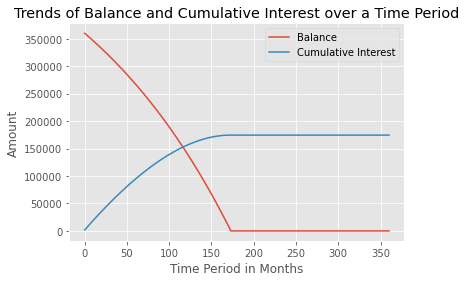

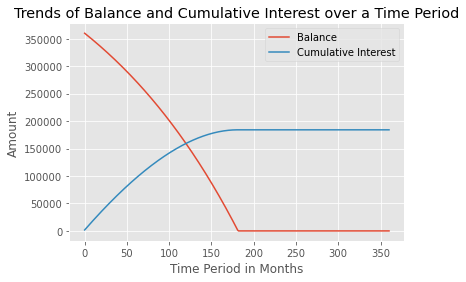

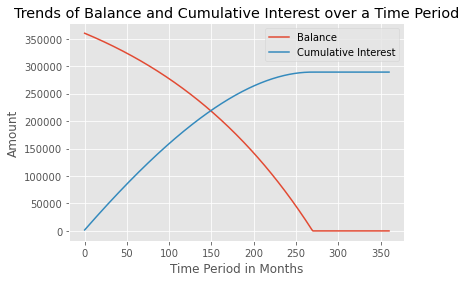

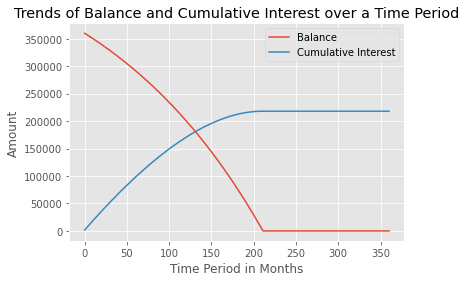

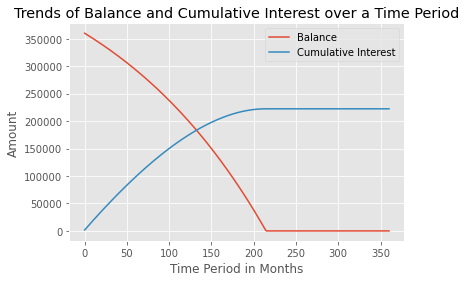

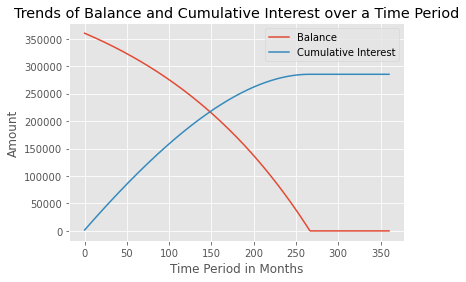

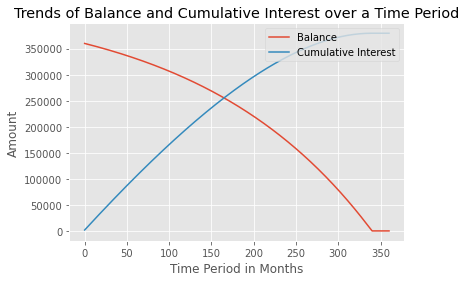

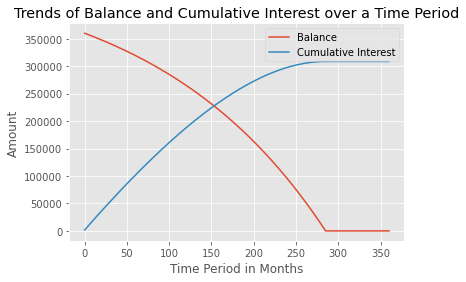

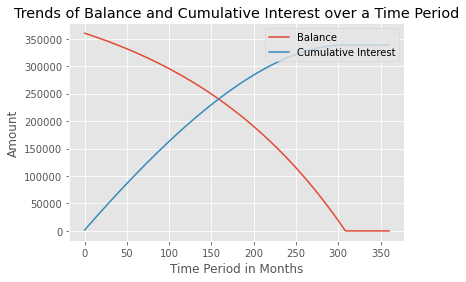

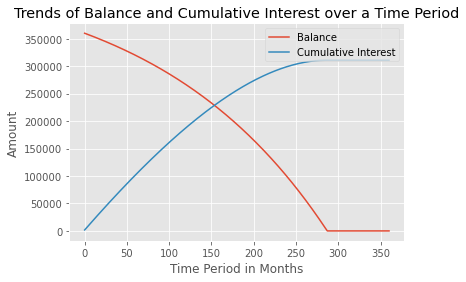

In [31]:
#Run the application using 10 random extra principal values
for i in range(10):
    ep = np.random.randint(1000)
    at,s = amortize(pv,rate,term,ep)
    print('Case ',i+1)
    print('\nBalance          = ',pv,'\nRate of Interest = ',rate,'\nTime period      = ',term,'\nExtra Principal  =',ep)
    print('\n',at.head())
    print('\n',at.tail())
    print('\n',s)
    plt.figure()
    with plt.style.context('ggplot'):
        plt.plot(at['Balance'], label='Balance')
        plt.plot(at['Cum_Int'], label = 'Cumulative Interest')
        plt.title('Trends of Balance and Cumulative Interest over a Time Period')
        plt.xlabel('Time Period in Months')
        plt.ylabel('Amount')
        plt.legend(loc=1)
    print('\n')
    